Задание 1.
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
#x = [1,2,3,4,5,6,7]
#y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7]

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [11]:
target = boston.target

In [12]:
feature_names = boston.feature_names

In [13]:
X = pd.DataFrame(data, columns=feature_names)
print(X)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [39]:
Y = pd.DataFrame(target, columns=['price'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
price = boston.target

In [31]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [52]:
from sklearn.manifold import TSNE

Применение t-SNE

In [53]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [54]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [56]:
X_train_tsne

array([[ 2.97641506e+01,  2.09873695e+01],
       [-4.24747753e+00, -1.05048418e+01],
       [-1.88142662e+01, -1.11759501e+01],
       [ 2.22976513e+01,  3.03626900e+01],
       [ 1.73852992e+00, -9.13341045e+00],
       [-9.11401844e+00, -1.16824980e+01],
       [-7.18314266e+00, -1.13112659e+01],
       [-2.71195641e+01, -1.09560461e+01],
       [ 2.35586834e+01,  2.98370991e+01],
       [ 2.21154327e+01,  2.70719757e+01],
       [-7.48745012e+00, -1.18326397e+01],
       [-6.44317818e+00, -3.84728122e+00],
       [-7.40933466e+00,  4.96774942e-01],
       [ 2.14254093e+01,  2.80373745e+01],
       [-9.20851231e+00,  8.65101755e-01],
       [ 6.97665644e+00, -8.96529102e+00],
       [ 4.76356819e-02, -6.78444767e+00],
       [-1.99967651e+01, -1.17451982e+01],
       [-1.69370003e+01, -4.91067171e+00],
       [-1.82409534e+01, -8.73804474e+00],
       [ 2.58343925e+01,  2.55089264e+01],
       [-1.82226837e-01, -3.70452142e+00],
       [-1.09841108e+01, -1.15292959e+01],
       [-6.

In [57]:
X_train_tsne.shape

(404, 2)

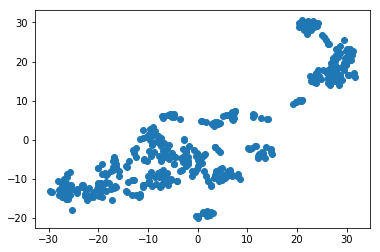

In [59]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [61]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters = 3,max_iter =100,random_state = 42 )

In [76]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [77]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [78]:
#labels_test = kmeans.fit_predict(X_test_scaled)

Text(8, 20, 'Кластер 2')

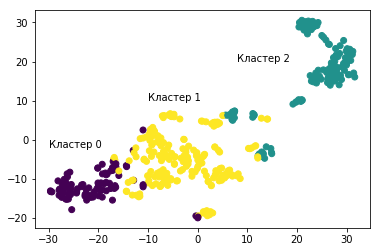

In [82]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c = labels_train)
plt.text(-30,-2,'Кластер 0')
plt.text(-10,10,'Кластер 1')
plt.text(8,20,'Кластер 2')

Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. 
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [105]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [106]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [107]:
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

Text(0, 100, 'Кластер 2')

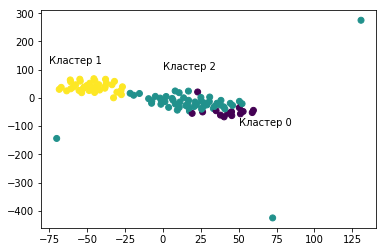

In [115]:
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1], c = labels_test)
plt.text(50,-100,'Кластер 0')
plt.text(-75,120,'Кластер 1')
plt.text(0,100,'Кластер 2')